# <font color='red'>Lab 07 - Glacier Bed Roughness</font>

### EARTH 468: Data Analysis & Model Estimation

##### Lab developed by E.A. Hetland

#### Due by the beginning of the lab period for the week of November 10, 2021 (2 weeks).

**For full credit:** 

Be sure to include your name with your notebook either as a markdown cell or in the file name. 

Write any necessary code in code cells below the description of each question. Write any discussion answers in markdown cells below the code cells, not as comments in your code. Be explicit about what you are answering and write in complete sentences. 

If you are asked to include a plot, make sure to label the axes and include a descriptive title.

To turn in this assignment, in the Jupyter toolbar select File/Download as/html or pdf. Make sure that all of your outputs are clear. Upload the downloaded file to the proper assignment submission page on Canvas. Please do not turn in a .ipynb file.

**Objective:** To gain insight into the construction of least squares problems and to determine model errors.

**Python Objective:** Further practice implementing matrix calculations in Jupyter and plotting error
bars.

**Data:** The data is entirely made up, and available in the file Lab07Data.csv.

# <font color='orange'>Excercise - 40 pts</font>

There are, in general, many factors that control the speed of an ice stream (an ice stream is a relatively
narrow and fast moving finger of ice off of an ice-sheet). When the bottom of the ice stream is well lubricated
by basal melting of the ice, the ice stream speed is limited by the roughness of the base. This limiting
roughness is due to irregular protrusions of the bedrock (i.e., barriers) in which the ice needs to flow
around in order for the ice stream to advance. There are two main mechanisms with which ice can flow
around a barrier on a rough bedrock surface: (1) plastic flow around the barriers, and (2) melting of ice on
the upstream side of the barrier, and re-freezing of the melt water on the downstream, or lee side, of the
barriers. Mechanism (1) dominates in the case where the characteristic dimensions of barriers is large,
while mechanism (2) dominates at smaller barrier sizes. Mechanism (2) is referred to as regelation, and the
melting and re-freezing of the ice results from the pressure differential across the barrier. In this problem,
we will assume that ice stream flow is entirely limited by regelation (see *Principles of Glacier Mechanics,
R. Hooke, 2005*, for full derivation). Regelation limited ice stream speed is given by:

<font size=4>$s=\phi H R,$ for $\phi=\frac{K_R C g}{L}$ and $R=\left(lr^2\right)^{-1}$ </font>

where $K_R$ is thermal conductivity of rock, $C$ and $L$ are the Classius-Clayperon slope and latent heat of
fusion of ice, respectively, $g$ is gravitational acceleration, $l$ is a characteristic dimension of barriers and $r$ is the roughness of the base ($r = l/$characteristic spacing of barriers), and $H$ is the thickness of the ice. $\phi$ is a constant that depends only on thermal properties and gravity, and $R-1$ is some parameterization of the roughness of the base of the ice stream (the units of $R$ are 1/length). In this problem, we will assume that $R$ is unknown.

Suppose that the speed of an ice stream was measured at several points along the ice stream, from the head
of the ice stream at $x = 0$ to the outlet of the ice stream at $x > 0$. At each point in which speed was measured, the thickness of the ice was precisely measured using sounding. (For simplicity, in this problem we
will assume that location and ice thickness are known precisely.)

Let’s assume that $R$ varies quadratically along the ice stream ($R = R_o + a x^2$), and so ice speed along the ice stream is given by:

<font size=4>$s_i=\phi H_i (R_o + a x_i^2)$</font>

where $R_o$ and $a$ are unknown. We will consider $\phi$ to have units of km/yr, the units of $R$ are km$^{-1}$, the units of $a$ are km$^{-3}$ , $x$ is in units of km, and $H$ is in units of m. $s_i$ is ice sheet speed, in units of m/yr, in the direction of the movement of the ice stream, measured at location $i$. Based on thermal properties of ice and granite, $\phi$ is given below. 

$\phi=1.37\times10^{-7}$ km/yr

The data is shown below and is also in the file *Lab07Data.csv*. The uncertainty on the ice stream speed measurement is the same for all stations, given as σ below, and the data are uncorrelated.

<img src='datalab07.png'>

## <font color='red'>Import Libraries:</font>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## <font color='red'>a) 6 pts</font>

Identify the data, data context, known parameters, and the model state in the above equation for $s_i$.

The data is $s_i$ (the ice speed), the data context is $x_i$ (location), and the known parameters are 𝜙 and $H_i$. Therefore, the model state in the above equation is $R_o$ and 𝑎 (unknown parameters that control the system).

In [9]:
df = pd.read_csv('Lab07Data.csv')
xs = np.array(df['x (km)'])
hs = np.array(df['h (m)'])
s = np.array(df['s (m/y)'])
sigmas = np.array(df['σ (m/yr)'])
phi = 1.37*10**(-7)

df

,x (km),h (m),s (m/y),σ (m/yr)
0,0.0,93.1,76.4,2.2
1,8.6,91.4,75.1,2.2
2,14.8,107.1,85.7,2.2
3,25.7,99.1,79.9,2.2
4,35.1,115.2,97.7,2.2
5,40.2,116.8,100.9,2.2


## <font color='red'>b) 10 pts</font>

Construct the $G$ matrix in the relationship $G \vec{m} = \vec{d}$. 

*Hint: write down what this should look like on paper first. You might want to review the construction of the G design matrix for a linear model system in lab06, or the example on slide 12 of lecture 10*.

$G_{(regelation)} = \begin{pmatrix} \Phi H_0 & \Phi H_0 x_0^2 \\
                     \Phi H_1 & \Phi H_1 x_1^2 \\
                     \vdots & \vdots \\
                     \Phi H_5 & \Phi H_5 x_5^2 \end{pmatrix} $

In [12]:
def glacier_G(context,thermal,thickness): # context: location (x_i) in km; thermal: phi in km/yr; thickness: H_i in m
    
    Gcol0 = thermal*thickness
    Gcol1 = Gcol0*context**2
    G = np.vstack((Gcol0,Gcol1)).T
    
    return G

G = glacier_G(xs,phi,hs)
G
    

array([[1.27547000e-05, 0.00000000e+00],
       [1.25218000e-05, 9.26112328e-04],
       [1.46727000e-05, 3.21390821e-03],
       [1.35767000e-05, 8.96727458e-03],
       [1.57824000e-05, 1.94440746e-02],
       [1.60016000e-05, 2.58592257e-02]])

## <font color='red'>c) 8 pts</font>

Solve for the model using least squares. Recall from lecture 10 (slides 18-21) that the least squares solution can be represented as:

<font size=4>$\vec{m_{est}}=\left(G^T C_d^{-1} G\right)^{-1} G^T C_d^{-1} \vec{d}$</font>

Report the best estimated model, and include the units.

In [18]:
Cd = np.diag(sigmas)
Cd

array([[2.2, 0. , 0. , 0. , 0. , 0. ],
       [0. , 2.2, 0. , 0. , 0. , 0. ],
       [0. , 0. , 2.2, 0. , 0. , 0. ],
       [0. , 0. , 0. , 2.2, 0. , 0. ],
       [0. , 0. , 0. , 0. , 2.2, 0. ],
       [0. , 0. , 0. , 0. , 0. , 2.2]])

In [19]:
np.linalg.inv(G.T@np.linalg.inv(Cd)@G)@G.T@np.linalg.inv(Cd)@s

array([5.88034769e+06, 2.38236709e+02])

In [21]:
m = np.linalg.inv(G.T@G)@G.T@s

In [22]:
print('The best fit model, m, is R0 = {} km-1 and a = {} km-3'.format(m[0],m[1]))

The best fit model, m, is R0 = 5880347.688237378 km-1 and a = 238.23670890483345 km-3


## <font color='red'>d) 6 pts</font>

Compute the predictions of the best fit model found above, and plot these predictions along with the data with $x$ on the x-axis (also include the data error bars in the plot - recall plotting error bars from lab 2).

In [24]:
predictions = G@m
predictions

array([ 75.00207066,  73.85317164,  87.04624844,  81.97205044,
        97.4382917 , 100.25558839])

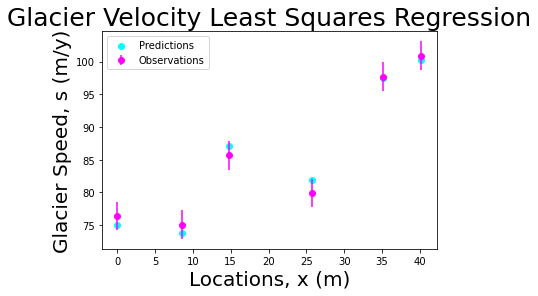

In [26]:
fig = plt.figure()
ax = fig.add_subplot()
ax.errorbar(xs,s,yerr=sigmas,linestyle='None',marker='o',color='magenta',label='Observations')
ax.scatter(xs,predictions,color='cyan',label='Predictions')
ax.set_xlabel('Locations, x (m)',size=20)
ax.set_ylabel('Glacier Speed, s (m/y)',size=20)
ax.set_title('Glacier Velocity Least Squares Regression',size=25)
plt.legend();

## <font color='red'>e) 10 pts</font>

Referring to the geometric interpretation of least squares in Lecture 10 (slide 16), we can see that the model covariance matrix is given by:

<font size=4>$C_m^{-1}=G^T C_d^{-1} G$</font>

For this problem, the model covariance matrix is either of the form

$ C_m = \begin{pmatrix} \sigma_{R_0}^2 & \sigma_{aR_0}^2 \\
          \sigma_{aR_0}^2 & \sigma_{a}^2 \end{pmatrix} $ or  $C_m = \begin{pmatrix} \sigma_{a}^2 & \sigma_{aR_0}^2 \\
          \sigma_{aR_0}^2 & \sigma_{R_0}^2 \end{pmatrix} $
          

depending on how the design matrix was constructed.

Solve for the model covariance matrix, $C_m$. 

<b>Report the best estimation of $R_o$ and $a$ from part c along with the uncertainties from $C_m$. </b>

In [27]:
Cm = np.linalg.inv(G.T@np.linalg.inv(Cd)@G)
Cm

array([[ 4.30658622e+09, -3.40920096e+06],
       [-3.40920096e+06,  4.63139542e+03]])

In [28]:
print('R0: {} plus/minus {} km-1'.format(m[0],np.sqrt(Cm[0,0])))

R0: 5880347.688237378 plus/minus 65624.58544870805 km-1


In [29]:
print('a: {} plus/minus {} km-3'.format(m[1],np.sqrt(Cm[1,1])))

a: 238.23670890483345 plus/minus 68.05435639056977 km-3
